# GRUPPEN-PROJEKT 12

# EINFÜHRUNG

**Obesity** in ihrem wissenschaftlichen Name **Adipositas** stellt ein globales Gesundheitsproblem dar, welches sowohl physische als auch psychische Probleme verursacht und ernsthafte Konsequenzen mit sich bringt. Die Prävalenz von Adipositas steigt kontinuierlich an, was die Notwendigkeit weiterer Forschung zur Untersuchung der Einflussfaktoren der Adipositas und zur Vorhersage des Auftretens dieser Erkrankung basierend auf diesen Faktoren erhöht.

In diesem Projekt nutzen wir einen Datensatz, der Daten zur Schätzung der Adipositasniveaus von Individuen aus den Ländern Mexiko, Peru und Kolumbien enthält. Die Daten stützen sich auf die Ernährungsgewohnheiten und den körperlichen Zustand der Individuen. Der Datensatz besteht aus 17 Attributen und 2111 Datensätzen. Diese Datensätze sind mit der Klassenvariable NObesity (Adipositasniveau) versehen, die eine Klassifizierung der Daten anhand der Werte "Untergewicht", "Normalgewicht", "Übergewicht Level I", "Übergewicht Level II", "Adipositas Typ I", "Adipositas Typ II" und "Adipositas Typ III" ermöglicht.

77% der Daten wurden synthetisch unter Verwendung des Weka-Tools und des SMOTE-Filters (Synthetic Minority Over-sampling Technique) generiert, während 23% der Daten direkt von Benutzern über eine Webplattform gesammelt wurden. 

*Unter dem folgenden Link können Sie den Datensatz hochladen: https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels*

Das Hauptziel unserer  besteht darin, die Faktoren zu untersuchen, die Adipositas beeinflussen, und vorherzusagen, wie wahrscheinlich es ist, dass eine Person adipös wird, basierend auf diesen Faktoren. Zu diesem Zweck werden verschiedene Hypothesen formuliert und durch die Analyse und Visualisierung der vorhandenen Daten überprüft.

# FRAGESTELLUNG

**Was sind die Einflussfaktoren auf das Entstehen von Fettleibigkeit?**


Die Adipositas kann einen signifikanten Einfluss auf die Lebensqualität von Individuen haben, was zu körperlichen Einschränkungen, einem Rückgang des Selbstwertgefühls und sozialen Schwierigkeiten führt. Diese Faktoren haben Auswirkungen nicht nur auf das individuelle Wohlbefinden, sondern auch auf die öffentliche Gesundheitssysteme und die Wirtschaft im Allgemeinen. Durch Investitionen in die Adipositasforschung können wir hoffen, die Prävalenz dieser komplexen Erkrankung zu reduzieren und die Gesundheit und das Wohlbefinden von Millionen von Menschen weltweit zu verbessern.

# HYPOTHESE : 

**Hypothese 1: Ernährung und Alkohol hätten einen Einfluss auf die Fettleibigkeit**

**Begründung:**
Eine ungesunde Ernährung, die reich an kalorienreichen, fett- und zuckerhaltigen Lebensmitteln ist, trägt zur Gewichtszunahme und Fettleibigkeit bei. Alkoholkonsum liefert zusätzliche leere Kalorien und kann den Fettstoffwechsel beeinträchtigen. Studien zeigen, dass diese Faktoren das Risiko für Fettleibigkeit signifikant erhöhen, da sie den Energiehaushalt und den Stoffwechsel negativ beeinflussen.

**Hypothese 2: Menschen mit einer familiären Vorgeschichte von Übergewicht hätten ein signifikant höheres Risiko, selbst fettleibig zu werden**

**Begründung:**
Genetische Veranlagung spielt eine große Rolle bei der Entwicklung von Fettleibigkeit. Personen mit übergewichtigen Familienmitgliedern haben ein höheres Risiko, selbst fettleibig zu werden, da genetische Faktoren den Stoffwechsel und die Fettverteilung beeinflussen. Zudem können gemeinsame familiäre Essgewohnheiten und Lebensstile das Risiko weiter erhöhen. Studien bestätigen, dass genetische und familiäre Einflüsse starke Prädiktoren für Fettleibigkeit sind.

**Hypothese 3: Personen, die häufig zwischen den Mahlzeiten naschen, hätten ein höheres Risiko, übergewichtig oder fettleibig zu werden**

**Begründung:**
Häufiges Naschen erhöht die tägliche Kalorienaufnahme, insbesondere wenn die Snacks ungesund sind. Diese zusätzlichen Kalorien führen zu Gewichtszunahme, wenn sie nicht durch körperliche Aktivität ausgeglichen werden. Regelmäßiges Naschen kann auch das Hungergefühl und die regulären Mahlzeiten beeinflussen, was zu einem Ungleichgewicht im Energiehaushalt führt. Forschungsergebnisse belegen, dass ungesundes Naschen mit einem höheren Risiko für Übergewicht und Fettleibigkeit verbunden ist.

**Hypothese 4: Personen, die stark von der Nutzung technologischer Geräte wie Smartphones, Computer, Fernseher und Videospielkonsolen abhängig wären, hätten ein höheres Risiko, übergewichtig oder fettleibig zu werden**

**Begründung:**
Der übermäßige Gebrauch technologischer Geräte ist oft mit einem sitzenden Lebensstil verbunden, der den Energieverbrauch reduziert und zur Gewichtszunahme beiträgt. Lange Bildschirmzeiten verdrängen körperliche Aktivität und verlangsamen den Stoffwechsel. Zudem sind sie oft mit ungesunden Essgewohnheiten verknüpft. Studien zeigen, dass ein hoher Konsum von Bildschirmmedien und ein sitzender Lebensstil signifikante Risikofaktoren für die Entwicklung von Übergewicht und Fettleibigkeit sind.


# IMPORTIERUNG DER BIBLIOTHEKEN

In [1]:
import pandas as  pd
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_percentage_error

# EINLESEN DER CSV ALS DATAFRAME

Hierbei geht es darum, den Datensatz einzulesen und anschließend ausschließlich die für uns relevanten Variablen zu laden und weiter zu verarbeiten.

Dazu erstellen wir zunächst eine Variable mit dem Namen raw_data. Diese Variable wird der Name unseres DataFrames sein.

In [2]:
FILENAME_DATASET = "c:\\Users\\molom\\Kurs_Predictive_Analytics\\kurs_predictive_analytics\\data\\ObesityDataSet.csv"  # Hier den Pfad anpassen
raw_data = pd.read_csv(FILENAME_DATASET,sep=",")

raw_data



,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


**SPALTEN_BEDEUTUNG**

Gender: Feature, Categorical, "Gender"

Age : Feature, Continuous, "Age"

Height: Feature, Continuous

Weight: Feature Continuous

family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "

FAVC : Feature, Binary, " Do you eat high caloric food frequently? "

FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "

NCP : Feature, Continuous, " How many main meals do you have daily? "

CAEC : Feature, Categorical, " Do you eat any food between meals? "

SMOKE : Feature, Binary, " Do you smoke? "

CH2O: Feature, Continuous, " How much water do you drink daily? "

SCC: Feature, Binary, " Do you monitor the calories you eat daily? "

FAF: Feature, Continuous, " How often do you have physical activity? "

TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

CALC : Feature, Categorical, " How often do you drink alcohol? "

MTRANS : Feature, Categorical, " Which transportation do you usually use? "

NObeyesdad : Target, Categorical, "Obesity level"

# TEIL I- DATEN CLEANING UND AUFBEREITUNG


In diesem Teil der Arbeit  wollen wir uns mit der  Aufbereitung und das Saubern der Umfragedaten beschäftigen. Konkret wollen wir:
- Daten mit benötigten Spalten fur unsere Analyse laden, ergänzen und manipulieren
- den Datensatz auf fehlende und fehlerhafte Werte überprüfen
- Fehlwerte bereinigen bzw. imputieren
- Dokumentation von hinzugefügten Features (Variablen) sowie der Datensatzbereinigung.

Basierend auf unsere Hypothese , werden wir uns nur mit den Variablen **FAVC, CALC, Gender , Weight, Height, family_history_with_overweight, CAEC , TUE , NObeyesdad**  beschäftigen.

In [3]:
benötigte_spalten = [ 'Gender','Height', 'Weight', 'CALC', 'FAVC','family_history_with_overweight', 'TUE','CAEC','NObeyesdad']


# Die Variable **df** ist der neue DataFrame,der nur die ausgewählten Spalten für unsere Analyse enthält
df = raw_data[benötigte_spalten]


# Zeige das DataFrame mit den ausgewählten Spalten an
df

,Gender,Height,Weight,CALC,FAVC,family_history_with_overweight,TUE,CAEC,NObeyesdad
0,Female,1.620000,64.000000,no,no,yes,1.000000,Sometimes,Normal_Weight
1,Female,1.520000,56.000000,Sometimes,no,yes,0.000000,Sometimes,Normal_Weight
2,Male,1.800000,77.000000,Frequently,no,yes,1.000000,Sometimes,Normal_Weight
3,Male,1.800000,87.000000,Frequently,no,no,0.000000,Sometimes,Overweight_Level_I
4,Male,1.780000,89.800000,Sometimes,no,no,0.000000,Sometimes,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,1.710730,131.408528,Sometimes,yes,yes,0.906247,Sometimes,Obesity_Type_III
2107,Female,1.748584,133.742943,Sometimes,yes,yes,0.599270,Sometimes,Obesity_Type_III
2108,Female,1.752206,133.689352,Sometimes,yes,yes,0.646288,Sometimes,Obesity_Type_III
2109,Female,1.739450,133.346641,Sometimes,yes,yes,0.586035,Sometimes,Obesity_Type_III


**Überprüfung, Bereinigung bzw. Imputierung des Datensatzes** : Fokus auf fehlende und fehlerhafte Werte

In [4]:
# Alle Spalten anzeigen
df.columns

Index(['Gender', 'Height', 'Weight', 'CALC', 'FAVC',
       'family_history_with_overweight', 'TUE', 'CAEC', 'NObeyesdad'],
      dtype='object')

In [5]:
# Alle Informationen  über den DataFame werden angezeigt (Anzahl der Zeilen und Spalten sowie die Datentypen und *memory usage* )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Height                          2111 non-null   float64
 2   Weight                          2111 non-null   float64
 3   CALC                            2111 non-null   object 
 4   FAVC                            2111 non-null   object 
 5   family_history_with_overweight  2111 non-null   object 
 6   TUE                             2111 non-null   float64
 7   CAEC                            2111 non-null   object 
 8   NObeyesdad                      2111 non-null   object 
dtypes: float64(3), object(6)
memory usage: 148.6+ KB


**Dtype, Unique and Null**

Die Erstellung eines DataFrames mit den Informationen über Datentypen (Dtype), Anzahl eindeutiger Werte (Unique) und Anzahl fehlender Werte (Null) ist eine nützliche Methode zur Erkundung und Analyse eines Datensatzes. Dieser DataFrame kann verwendet werden, um einen Überblick über die Struktur und Qualität der Daten zu erhalten.

Hier sind einige Gründe, warum diese Informationen wichtig sind:

**Datenqualität prüfen:**

Fehlende Werte (Null): Es ist wichtig zu wissen, wie viele fehlende Werte in jeder Spalte vorhanden sind
Datenverständnis verbessern:

Datentypen (Dtype): Zu wissen, welche Art von Daten (z.B. integer, float, object) in jeder Spalte vorhanden ist, hilft bei der Auswahl geeigneter Analyse- und Verarbeitungsmethoden. Beispielsweise erfordert die Verarbeitung numerischer Daten andere Techniken als die Verarbeitung von Textdaten.

Anzahl eindeutiger Werte (Unique): Diese Information zeigt, wie viele verschiedene Werte in jeder Spalte vorhanden sind. 

In [6]:
# Creating DataFrame with Dtype, Unique, and Null information
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

,Dtype,Unique,Null
Gender,object,2,0
Height,float64,1574,0
Weight,float64,1525,0
CALC,object,4,0
FAVC,object,2,0
family_history_with_overweight,object,2,0
TUE,float64,1129,0
CAEC,object,4,0
NObeyesdad,object,7,0


Es fällt uns auf, dass unser DataFrame keine Fehler aufweist. Auch die prädiktiven Variablen entsprechen exakt ihren Datentypen. Zudem sind alle vorhandenen Zeilen vorhanden. Aber wir können auch sicherstellen ,dass es keine Fehler gibt in dem wir den relativen Anteil der Ferhler pro Spalte berechnen. Zeigt den relativen Anteil der Fehler **0.00**, ist unser Datensatz Fehlerfrei. Andersfall wird versucht werden, die potenziellen Fehler zu bereinigen

Die Zielvariable 'NObeyesdad', von der die anderen Variablen abhängen, ist außerdem kategorial.
Für unsere Analyse benötigen wir jedoch metrische Daten, um diese effizienter durchführen zu können.

Aus diesem Grund erstellen wir eine zusätzliche Variable namens BMI, welche die kategorialen Werte der Zielvariable in metrische Werte gemäß einer formellen Standardisierung umwandeln wird.

Ausführliche Informationen zum BMI finden Sie unter folgendem Link: https://www.barmer.de/gesundheit-verstehen/leben/abnehmen-diaet/body-mass-index/bmi-rechner-1004244#:~:text=BMI%2DFormel%20%3D%20K%C3%B6rpergewicht%20(in,(in%20m%20)%20zum%20Quadrat.



In [7]:
df.isnull().sum() / len(df) * 100    #Berechnet den prozentualen Anteil der fehlenden Werte für jede Spalte im DataFrame df

Gender                            0.0
Height                            0.0
Weight                            0.0
CALC                              0.0
FAVC                              0.0
family_history_with_overweight    0.0
TUE                               0.0
CAEC                              0.0
NObeyesdad                        0.0
dtype: float64

Der relative Anteil der Fehler weißt 0.00 % je Spalte auf. Dies bestätigt , dass den Datensatz fehrlerfrei ist und vertrauenwürdig für den weiteren Verlauf der Verarbeitung

**Creating New Features : BMI**


Der Body-Mass-Index (BMI) ist ein Maß, mit dem beurteilt wird, ob eine Person im Verhältnis zu ihrer Körpergröße ein gesundes Gewicht hat. Er wird berechnet, indem das Gewicht (in Kilogramm) durch das Quadrat der Körpergröße (in Metern) geteilt wird.

**BMI = WEIGHT in Kg/(HEIGHT in Meters)²**


In [8]:
# Spalte BMI einfügen
df['BMI'] = df['Weight'] / (df['Height'])**2

# DataFrame mit der neuen Variable einlesen
df

C:\Users\molom\AppData\Local\Temp\ipykernel_63072\1773883387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'] = df['Weight'] / (df['Height'])**2


,Gender,Height,Weight,CALC,FAVC,family_history_with_overweight,TUE,CAEC,NObeyesdad,BMI
0,Female,1.620000,64.000000,no,no,yes,1.000000,Sometimes,Normal_Weight,24.386526
1,Female,1.520000,56.000000,Sometimes,no,yes,0.000000,Sometimes,Normal_Weight,24.238227
2,Male,1.800000,77.000000,Frequently,no,yes,1.000000,Sometimes,Normal_Weight,23.765432
3,Male,1.800000,87.000000,Frequently,no,no,0.000000,Sometimes,Overweight_Level_I,26.851852
4,Male,1.780000,89.800000,Sometimes,no,no,0.000000,Sometimes,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...
2106,Female,1.710730,131.408528,Sometimes,yes,yes,0.906247,Sometimes,Obesity_Type_III,44.901475
2107,Female,1.748584,133.742943,Sometimes,yes,yes,0.599270,Sometimes,Obesity_Type_III,43.741923
2108,Female,1.752206,133.689352,Sometimes,yes,yes,0.646288,Sometimes,Obesity_Type_III,43.543817
2109,Female,1.739450,133.346641,Sometimes,yes,yes,0.586035,Sometimes,Obesity_Type_III,44.071535


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Height                          2111 non-null   float64
 2   Weight                          2111 non-null   float64
 3   CALC                            2111 non-null   object 
 4   FAVC                            2111 non-null   object 
 5   family_history_with_overweight  2111 non-null   object 
 6   TUE                             2111 non-null   float64
 7   CAEC                            2111 non-null   object 
 8   NObeyesdad                      2111 non-null   object 
 9   BMI                             2111 non-null   float64
dtypes: float64(4), object(6)
memory usage: 165.1+ KB


Es ist schon erscheinbar ,dass eine Spalte mehr eingeführt worden ist. Davor hatten wir neuen Spalten und jetzt haben wir zehn.

# TEIL II - ANALYSE
## Deskriptive Statistiken und Visualisierungen  ##


In diesem Abschnitt unseres Projekts gehen wir konkret vor:
- Eine Deskriptive Statistiken zu den von uns verwendeten Hauptvariablen durchzuführen
- Berechnung der Lage-, Streuungsmaße
- Erzeugung des Plots  
- Begründung, weswegen wir uns  für eine Statistik bzw. einen Plot entschieden haben und was wir damit zeigen wollen
- Interpretierung  des  Ergebnisses im Kontext unserer Hypothesen und Fragestellungen.

In [10]:
df = df.copy()  # Lass uns mit einer Kopie der Daten arbeiten.

Wir möchten genau wissen, welche Ergebnisse die Statistiken bei Männern und Frauen liefern. Dies würde uns dabei helfen, die typischen Faktoren zwischen den beiden Geschlechtern genau zu untersuchen und zu unterscheiden.

Genau deswegen teilen wir den Hauptdatensatz in zwei anderen Datensätze . Diese beiden entsprechen genau den Datensatz der Männer und Frauen.

In [11]:
data_men, data_women = df[df['Gender'] == 'Male'].drop(columns='Gender'), df[df['Gender'] == 'Female'].drop(columns='Gender')
men_count, women_count = data_men.count(), data_women.count()

In [12]:
data_men

,Height,Weight,CALC,FAVC,family_history_with_overweight,TUE,CAEC,NObeyesdad,BMI
2,1.800000,77.000000,Frequently,no,yes,1.000000,Sometimes,Normal_Weight,23.765432
3,1.800000,87.000000,Frequently,no,no,0.000000,Sometimes,Overweight_Level_I,26.851852
4,1.780000,89.800000,Sometimes,no,no,0.000000,Sometimes,Overweight_Level_II,28.342381
5,1.620000,53.000000,Sometimes,yes,no,0.000000,Sometimes,Normal_Weight,20.195092
7,1.640000,53.000000,Sometimes,no,no,0.000000,Sometimes,Normal_Weight,19.705532
...,...,...,...,...,...,...,...,...,...
1794,1.653876,102.583895,no,yes,yes,0.636289,Sometimes,Obesity_Type_II,37.503629
1795,1.657132,105.580491,no,yes,yes,1.122118,Sometimes,Obesity_Type_II,38.447621
1796,1.644751,101.067988,no,yes,yes,0.819980,Sometimes,Obesity_Type_II,37.360554
1797,1.660761,104.321463,no,yes,yes,1.239038,Sometimes,Obesity_Type_II,37.823298


In [13]:
data_women

,Height,Weight,CALC,FAVC,family_history_with_overweight,TUE,CAEC,NObeyesdad,BMI
0,1.620000,64.000000,no,no,yes,1.000000,Sometimes,Normal_Weight,24.386526
1,1.520000,56.000000,Sometimes,no,yes,0.000000,Sometimes,Normal_Weight,24.238227
6,1.500000,55.000000,Sometimes,yes,yes,0.000000,Sometimes,Normal_Weight,24.444444
11,1.720000,80.000000,Sometimes,yes,yes,1.000000,Frequently,Overweight_Level_II,27.041644
15,1.700000,66.000000,Sometimes,no,yes,1.000000,Always,Normal_Weight,22.837370
...,...,...,...,...,...,...,...,...,...
2106,1.710730,131.408528,Sometimes,yes,yes,0.906247,Sometimes,Obesity_Type_III,44.901475
2107,1.748584,133.742943,Sometimes,yes,yes,0.599270,Sometimes,Obesity_Type_III,43.741923
2108,1.752206,133.689352,Sometimes,yes,yes,0.646288,Sometimes,Obesity_Type_III,43.543817
2109,1.739450,133.346641,Sometimes,yes,yes,0.586035,Sometimes,Obesity_Type_III,44.071535


**Deskriptive Statistiken**

In [14]:


# Berechnen deskriptiver Statistiken für _alle_ Variablen bei Männern
data_men.describe(include="all").round(2)

,Height,Weight,CALC,FAVC,family_history_with_overweight,TUE,CAEC,NObeyesdad,BMI
count,1068.00,1068.00,1068,1068,1068,1068.00,1068,1068,1068.00
unique,NaN,NaN,4,2,2,NaN,4,7,NaN
top,NaN,NaN,Sometimes,yes,yes,NaN,Sometimes,Obesity_Type_II,NaN
freq,NaN,NaN,690,966,915,NaN,921,295,NaN
mean,1.76,90.77,NaN,NaN,NaN,0.67,NaN,NaN,29.28
std,0.07,21.41,NaN,NaN,NaN,0.64,NaN,NaN,6.35
min,1.56,45.00,NaN,NaN,NaN,0.00,NaN,NaN,13.29
25%,1.71,75.00,NaN,NaN,NaN,0.00,NaN,NaN,25.57
50%,1.76,89.95,NaN,NaN,NaN,0.60,NaN,NaN,28.91
75%,1.81,108.46,NaN,NaN,NaN,1.00,NaN,NaN,35.22


In [15]:
Height_mittelwert = data_men["Height"].mean()
Height_median = data_men["Height"].median()
Height_stabw =data_men["Height"].std()
a_Height = data_men["Height"].count()

print(
    f"Es stehen a={a_Height} valide Beobachtungen für die Größe zur Verfügung.")
print(
    f"Der Mittelwert der Größe beträgt: {Height_mittelwert:.2f} meter")
print(f"Der Medianwert der Größe beträgt: {Height_median:.2f} meter")
print(
    f"Die Standardabweichung der Größe beträgt: {Height_stabw:.2f} meter")

Es stehen a=1068 valide Beobachtungen für die Größe zur Verfügung.
Der Mittelwert der Größe beträgt: 1.76 meter
Der Medianwert der Größe beträgt: 1.76 meter
Die Standardabweichung der Größe beträgt: 0.07 meter


In [16]:
Weight_mittelwert = data_men["Weight"].mean()
Weight_median = data_men["Weight"].median()
Weight_stabw = data_men["Weight"].std()
a_Weight = data_men["Weight"].count()

print(
    f"Es stehen a={a_Weight} valide Beobachtungen für das Gewicht der Männer zur Verfügung.")
print(
    f"Der Mittelwert des Gewichts beträgt: {Weight_mittelwert:.2f} kg")
print(f"Der Medianwert des Gewichts beträgt: {Weight_median:.2f} kg")
print(
    f"Die Standardabweichung des Gewichts beträgt: {Weight_stabw:.2f} kg")

Es stehen a=1068 valide Beobachtungen für das Gewicht der Männer zur Verfügung.
Der Mittelwert des Gewichts beträgt: 90.77 kg
Der Medianwert des Gewichts beträgt: 89.95 kg
Die Standardabweichung des Gewichts beträgt: 21.41 kg


In [17]:
TUE_mittelwert = data_men["TUE"].mean()
TUE_median =data_men["TUE"].median()
TUE_stabw = data_men["TUE"].std()
a_TUE = data_men["TUE"].count()

print(
    f"Es stehen a={a_TUE} valide Beobachtungen für Zeit mit Technologien zur Verfügung.")
print(
    f"Der Mittelwert der Uhrzeit beträgt: {TUE_mittelwert:.2f} uhr")
print(f"Der Medianwert der Uhrzeit beträgt: {TUE_median:.2f} uhr")
print(
    f"Die Standardabweichung der Uhrzeit beträgt: {TUE_stabw:.2f} uhr")

Es stehen a=1068 valide Beobachtungen für Zeit mit Technologien zur Verfügung.
Der Mittelwert der Uhrzeit beträgt: 0.67 uhr
Der Medianwert der Uhrzeit beträgt: 0.60 uhr
Die Standardabweichung der Uhrzeit beträgt: 0.64 uhr


### INTERPRETATION LAGE-STREUUNGSMAß



- *Weight*

Es stehen 1068 valide Beobachtungen für das Gewicht der Männer zur Verfügung.. Die deskriptive Analyse zeigt, dass das durchschnittliche  Gewicht der Männer 90.77 kg aufweißt. **[Das Lagemaß (Median) des Gewichts beträgt 89.95 kg]**. Während des mittleren Gewichts 90.77 kg beträgt, variert das Gewicht  stark : Das Minimum beträgt 45.00 kg und das Maximum beträgt 173.00 kg

Unsere Daten für das Gewicht  sind darüber hinaus in drei Quartile geteilt , bzw 25% (1/4 oder untere Quartil) , 50% (1/2 oder Median) , 75% (3/4 oder Obere Quartil) 
Dies bedeutet  , dass für 25% der Männer, ist das Gewicht  von 75.00 kg oder weniger, für 50% ist das Gewicht  von 89.95 kg oder weniger  und für 75% ist das Gewicht  von 108.46 kg oder weniger

-----------------------------------------------------------------------------------------------------------------------------------

- *TUE*

Es stehen a=1068 valide Beobachtungen für Zeit mit Technologien zur Verfügung.. Die statistische Analyse zeigt, dass die durchschnittliche Zeit bei 0.67 Stunden liegt, . **[Das Lagemaß (Median) der TUE beträgt   0.60 uhr]**. Während die mittlere  Zeit auf 0.67 Studen geschätzt wird, variieren die Zeiten von  Minimum 0.00  bis Maximum beträgt 2 Stunden.

 25% der Männer verbringen 00 Stunde mit Technologien , während für 50% verbringen 0.60 Studen oder weniger und 75%  eine Stunde oder weniger 


-----------------------------------------------------------------------------------------------------------------------------------
- *Height*

Es stehen a=1068 valide Beobachtungen für die Größe zur Verfügung.
Die statistische Analyse zeigt, dass die durchschnittliche Größe bei Männer zu 1.76 meter  liegt, . **[Das Lagemaß (Median) der Größe beträgt   1.76 meter]**. 
Während die mittlere  Größe auf 1.76 meter geschätzt wird, variieren die Größen  von  Minimum 1.56 meter  bis Maximum 1.98 meter

25% der Männer sind groß als 1.71 meter oder weniger , während für 50%  sind  1.76 meter oder weniger und 75%  sind 1.81meter oder weniger

-----------------------------------------------------------------------------------------------------------------------------------
- *BMI*

Es stehen a=1068 valide Beobachtungen für das BMI zur Verfügung. Die statistische Analyse weißt 29,28  als durchschnittliches BMI bei Männern auf

Das BMI varriert bei Männern von minimum 13.29 bis maximum 49.47
25%  der Männern haben ein BMI von 25.57(Normal) oder weniger, 50% haben ein BMI von 28.91 (overweight) oder weniger und 75% haben ein BMI von 35.22 oder weniger (Wir sprechen schon von Obesity).

*Jetzt beschäftigen wir uns mit den Frauen*

In [18]:
# Berechnen deskriptiver Statistiken für _alle_ Variablen bei den Frauen
data_women.describe(include="all").round(2)

,Height,Weight,CALC,FAVC,family_history_with_overweight,TUE,CAEC,NObeyesdad,BMI
count,1043.00,1043.00,1043,1043,1043,1043.00,1043,1043,1043.00
unique,NaN,NaN,3,2,2,NaN,4,7,NaN
top,NaN,NaN,Sometimes,yes,yes,NaN,Sometimes,Obesity_Type_III,NaN
freq,NaN,NaN,711,900,811,NaN,844,323,NaN
mean,1.64,82.30,NaN,NaN,NaN,0.65,NaN,NaN,30.13
std,0.07,29.72,NaN,NaN,NaN,0.57,NaN,NaN,9.40
min,1.45,39.00,NaN,NaN,NaN,0.00,NaN,NaN,13.00
25%,1.60,58.00,NaN,NaN,NaN,0.00,NaN,NaN,22.36
50%,1.64,78.00,NaN,NaN,NaN,0.66,NaN,NaN,28.47
75%,1.70,105.04,NaN,NaN,NaN,1.00,NaN,NaN,40.08


In [19]:
Height_mittelwert = data_women["Height"].mean()
Height_median = data_women["Height"].median()
Height_stabw =data_women["Height"].std()
a_Height = data_women["Height"].count()

print(
    f"Es stehen a={a_Height} valide Beobachtungen für die Größe zur Verfügung.")
print(
    f"Der Mittelwert der Größe beträgt: {Height_mittelwert:.2f} meter")
print(f"Der Medianwert der Größe beträgt: {Height_median:.2f} meter")
print(
    f"Die Standardabweichung der Größe beträgt: {Height_stabw:.2f} meter")

Es stehen a=1043 valide Beobachtungen für die Größe zur Verfügung.
Der Mittelwert der Größe beträgt: 1.64 meter
Der Medianwert der Größe beträgt: 1.64 meter
Die Standardabweichung der Größe beträgt: 0.07 meter


In [20]:
Weight_mittelwert = data_women["Weight"].mean()
Weight_median = data_women["Weight"].median()
Weight_stabw = data_women["Weight"].std()
a_Weight = data_women["Weight"].count()

print(
    f"Es stehen a={a_Weight} valide Beobachtungen für das Gewicht der Frauen zur Verfügung.")
print(
    f"Der Mittelwert des Gewichts beträgt: {Weight_mittelwert:.2f} kg")
print(f"Der Medianwert des Gewichts beträgt: {Weight_median:.2f} kg")
print(
    f"Die Standardabweichung des Gewichts beträgt: {Weight_stabw:.2f} kg")

Es stehen a=1043 valide Beobachtungen für das Gewicht der Frauen zur Verfügung.
Der Mittelwert des Gewichts beträgt: 82.30 kg
Der Medianwert des Gewichts beträgt: 78.00 kg
Die Standardabweichung des Gewichts beträgt: 29.72 kg


In [21]:
TUE_mittelwert = data_women["TUE"].mean()
TUE_median =data_women["TUE"].median()
TUE_stabw = data_women["TUE"].std()
a_TUE = data_women["TUE"].count()

print(
    f"Es stehen a={a_TUE} valide Beobachtungen für Zeit mit Technologien zur Verfügung.")
print(
    f"Der Mittelwert der Uhrzeit beträgt: {TUE_mittelwert:.2f} uhr")
print(f"Der Medianwert der Uhrzeit beträgt: {TUE_median:.2f} uhr")
print(
    f"Die Standardabweichung der Uhrzeit beträgt: {TUE_stabw:.2f} uhr")

Es stehen a=1043 valide Beobachtungen für Zeit mit Technologien zur Verfügung.
Der Mittelwert der Uhrzeit beträgt: 0.65 uhr
Der Medianwert der Uhrzeit beträgt: 0.66 uhr
Die Standardabweichung der Uhrzeit beträgt: 0.57 uhr


### INTERPRETATION LAGE-STREUUNGSMAß

- *Weight*

Es stehen 1043 valide Beobachtungen für das Gewicht der Frauen zur Verfügung.. Die deskriptive Analyse zeigt, dass das durchschnittliche  Gewicht der Frauen 82.30 kg beträgt. **[Das Lagemaß (Median) des Gewichts beträgt 78.00 kg]**. Während des mittleren Gewichts  82.30 kg beträgt, variert das Gewicht  stark : Das Minimum beträgt 39.00 kg und das Maximum beträgt 165.06 kg

Unsere Daten für das Gewicht  sind darüber hinaus in drei Quartile geteilt , bzw 25% (1/4) , 50% (2/4) , 75% (3/4) 
Dies bedeutet  , dass für 25% der Frauen, ist das Gewicht  von 58.00 kg oder weniger, für 50% ist das Gewicht  von 78 kg oder weniger  und für 75% ist das Gewicht  von 105.04kg oder weniger

-----------------------------------------------------------------------------------------------------------------------------------

- *TUE*

Es stehen a=1043 valide Beobachtungen für Zeit mit Technologien zur Verfügung.. Die statistische Analyse zeigt, dass die durchschnittliche Zeit bei 0.65 uhr liegt, . **[Das Lagemaß (Median) der TUE beträgt  0.66 uhr]**. Während die mittlere  Zeit auf 0.65 uhr geschätzt wird, variieren die Stunden von  Minimum 0.00  bis Maximum beträgt 2.

 25% der Frauen verbringen 00 Stunde mit Technologien , während für 50% verbringen 0.66 Studen oder weniger und 75%  eine Stunde oder weniger 


-----------------------------------------------------------------------------------------------------------------------------------
- *Height*

Es stehen a=1043 valide Beobachtungen für die Größe zur Verfügung.
Die statistische Analyse zeigt, dass die durchschnittliche Größe bei Frauen zu  1.64 meter  liegt, . **[Das Lagemaß (Median) der Größe beträgt    1.64 meter]**. 
Während die mittlere  Größe auf  1.64 meter geschätzt wird, variieren die Größen  von  Minimum 1.45 meter  bis Maximum 1.84 meter

25% der Frauen sind groß als 1.60 meter oder weniger , während für 50%  sind  1.64 meter oder weniger und 75%  sind 1.70meter oder weniger 

-----------------------------------------------------------------------------------------------------------------------------------

*BMI*

Es stehen a=1068 valide Beobachtungen für das BMI zur Verfügung. Die statistische Analyse weißt 30.13 als durchschnittliches BMI bei den Frauen auf

Das BMI varriert bei Frauen von minimum 13.00 bis maximum 50.81
25%  der Frauen haben ein BMI von 22.36 (Normal) oder weniger, 50% haben ein BMI von 28.47 (overweight) oder weniger und 75% haben ein BMI von 40.08 oder weniger (Wir sprechen schon von Obesity).




# TEIL 3 : VISUALISIERUNG


**In diesem Abschnitt des Projekts geht es darum, Daten grafisch darzustellen, um die Ergebnisse besser lesen und interpretieren zu können. Zunächst werden wir jedoch unsere Ausgangshypothesen wiederholen und versuchen, diese anhand der verfügbaren Visualisierungen zu überprüfen.**

## Hypothese 1

Wir vermuten, dass Ernährung und Alkohol einen Einfluss auf die Fettleibigkeit haben könnte. lass uns mal schauen , was die Grafiken zeigen.

Zu diesem Zweck hatten wir **Violin Plot** verwendet: Violin Plots werden verwendet, um die Verteilung des BMI in Bezug auf den häufigen Verzehr von hochkalorischen Lebensmitteln (FAVC) für Männer und Frauen separat zu visualisieren.

    **Linker Plot** betrifft die Männern.
    **Rechter Plot**betrifft die Frauen.

    Achsenbeschriftungen und Titel: Die X-Achse stellt die verteilung von personen, die Lebensmitteln mit hohen Kalorien verzehren und die  die nicht verzehren, während die Y-Achse den BMI darstellt. Die Plots sind entsprechend beschriftet und betitelt.



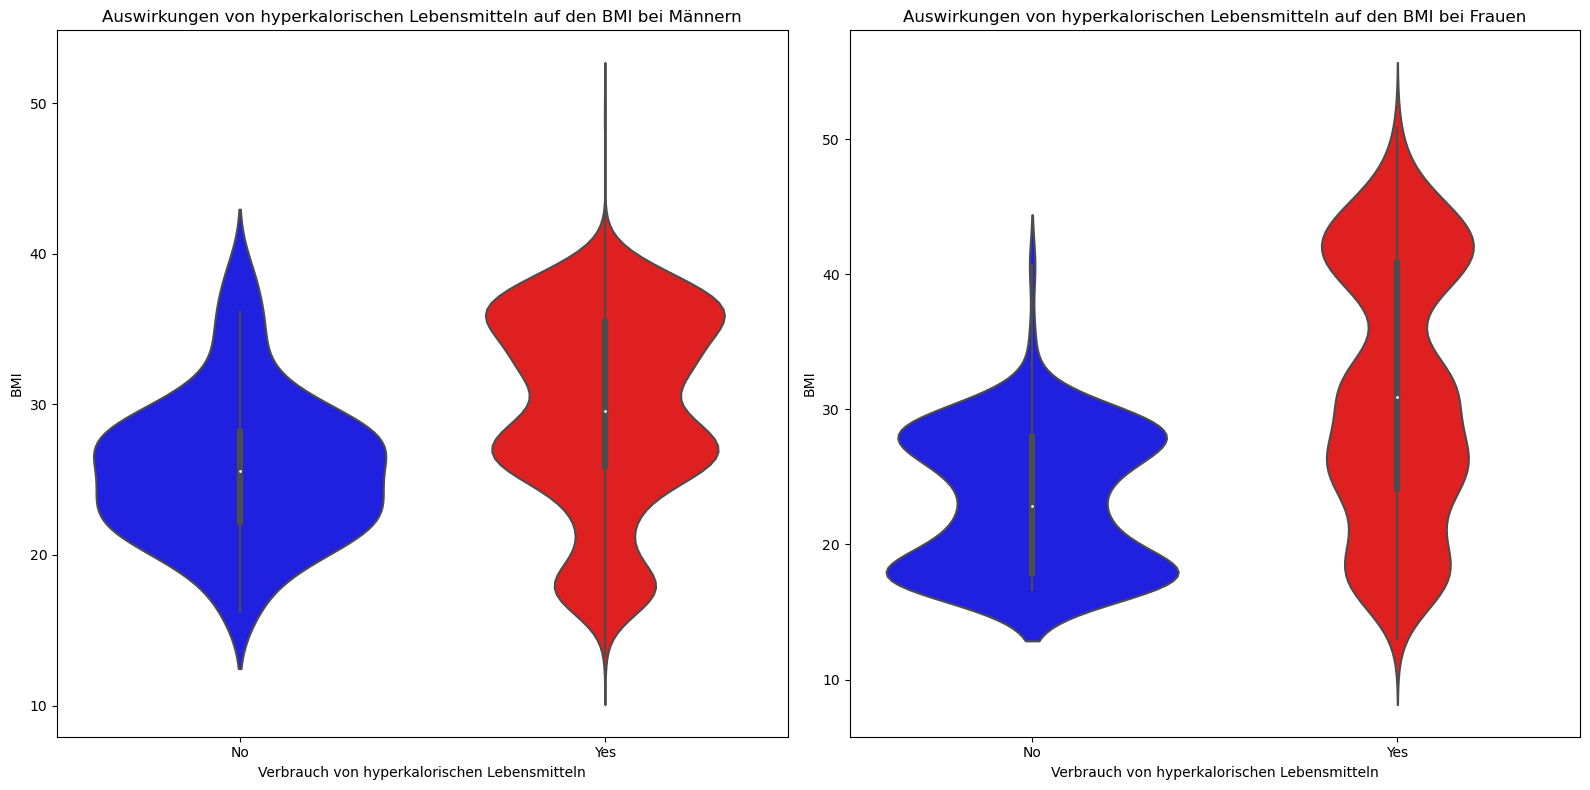

In [22]:
# Filtern der Daten für Männer und Frauen
data_men = df[df['Gender'] == 'Male']
data_women = df[df['Gender'] == 'Female']

# Violin Plot zur Visualisierung der BMI-Verteilung in Abhängigkeit von FAVC für jedes Geschlecht
plt.figure(figsize=(16, 8))

# Plot für Männer
plt.subplot(1, 2, 1)
sns.violinplot(x='FAVC', y='BMI', data=data_men, palette=['blue', 'red'])
plt.title('Auswirkungen von hyperkalorischen Lebensmitteln auf den BMI bei Männern')
plt.xlabel('Verbrauch von hyperkalorischen Lebensmitteln')
plt.ylabel('BMI')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# Plot für Frauen
plt.subplot(1, 2, 2)
sns.violinplot(x='FAVC', y='BMI', data=data_women, palette=['blue', 'red'])
plt.title('Auswirkungen von hyperkalorischen Lebensmitteln auf den BMI bei Frauen')
plt.xlabel('Verbrauch von hyperkalorischen Lebensmitteln')
plt.ylabel('BMI')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

Die Violin-Plots zeigen deutlich, dass der Verzehr von hochkalorischen Lebensmitteln sowohl bei Männern als auch bei Frauen mit höheren BMI-Werten korreliert.

**Bei Männern**: Es ist zu beobachten, dass diejenigen, die häufig hochkalorische Lebensmittel konsumieren („Ja“), eine höhere Dichte von BMI-Werten im höheren Bereich aufweisen im Vergleich zu denen, die dies nicht verzehren („Nein“). Der Median-BMI bei Männern, die hochkalorische Lebensmittel konsumieren, liegt ebenfalls höher, etwa bei 28, was darauf hinweist, dass der Konsum dieser Lebensmittel einen signifikanten Einfluss auf die BMI-Verteilung hätte.

**Bei Frauen**: Ähnlich ist bei Frauen festzustellen, dass der BMI bei häufigem Konsum hochkalorischer Lebensmittel („Ja“) tendenziell höher ist als bei Frauen, die keine hochkalorischen Lebensmittel konsumieren („Nein“). Der Median-BMI bei Frauen, die hochkalorische Lebensmittel konsumieren, liegt ebenfalls höher, ungefähr bei 30.

Diese Ergebnisse unterstützen die Hypothese, dass eine hochkalorische Ernährung einen signifikanten Einfluss auf die Fettleibigkeit haben könnte, sowohl bei Männern als auch bei Frauen. Der Verzehr von hochkalorischen Lebensmitteln führt zu einem höheren BMI und einem höheren Median-BMI, was auf ein erhöhtes Risiko für Fettleibigkeit hinweist.

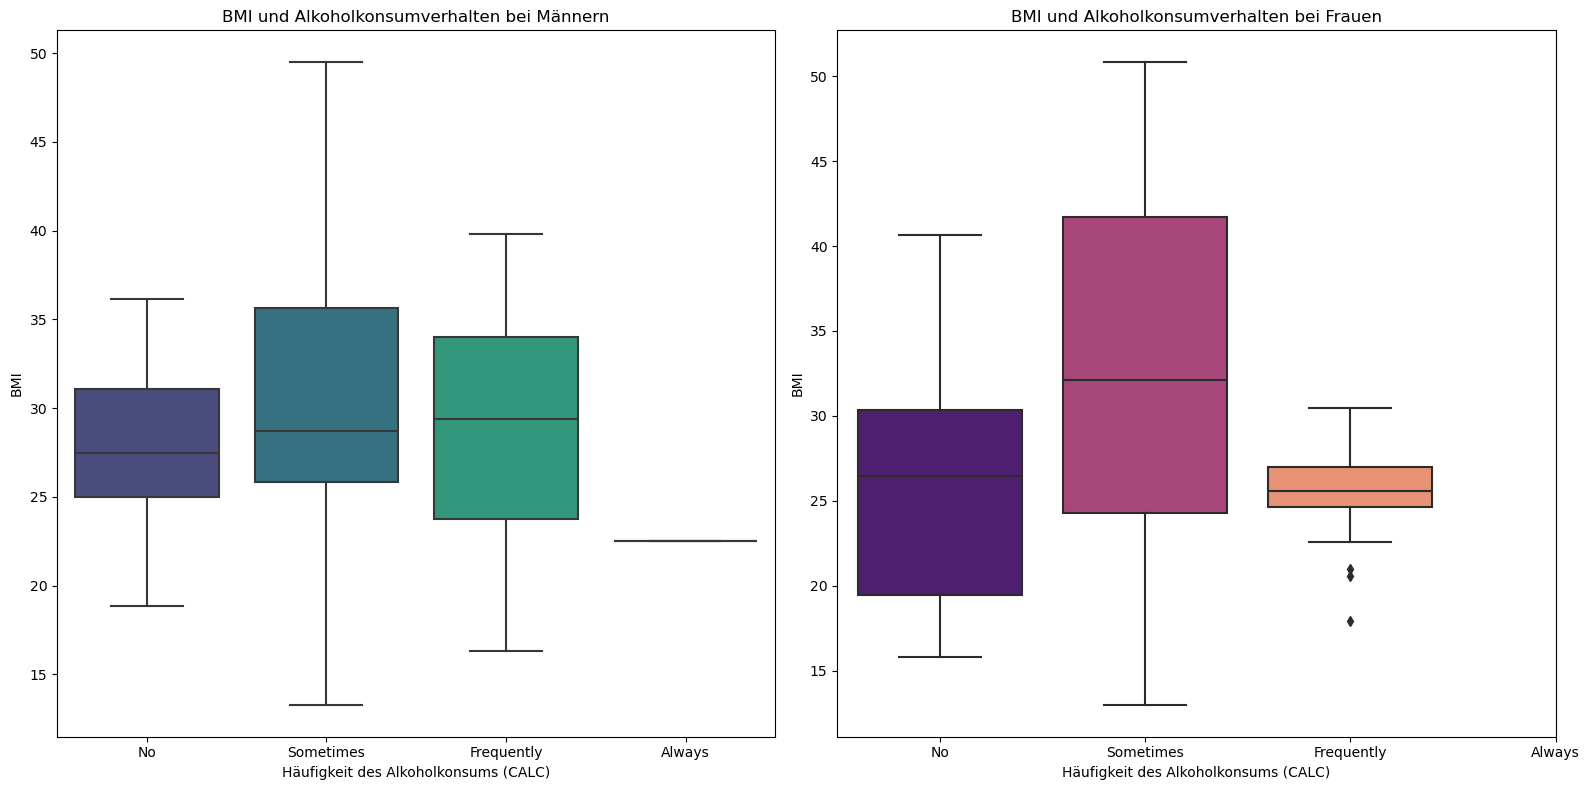

In [23]:
# Filtern der Daten für Männer und Frauen


data_men = df[df['Gender'] == 'Male']
data_women = df[df['Gender'] == 'Female']

# Box Plot zur Visualisierung der BMI-Verteilung in Abhängigkeit von CALC für jedes Geschlecht
plt.figure(figsize=(16, 8))

# Plot für Männer
plt.subplot(1, 2, 1)
sns.boxplot(x='CALC', y='BMI', data=data_men, palette='viridis')
plt.title('BMI und Alkoholkonsumverhalten bei Männern')
plt.xlabel('Häufigkeit des Alkoholkonsums (CALC)')
plt.ylabel('BMI')
plt.xticks(ticks=[0, 1, 2, 3], labels=['No', 'Sometimes', 'Frequently', 'Always'])

# Plot für Frauen
plt.subplot(1, 2, 2)
sns.boxplot(x='CALC', y='BMI', data=data_women, palette='magma')
plt.title('BMI und Alkoholkonsumverhalten bei Frauen')
plt.xlabel('Häufigkeit des Alkoholkonsums (CALC)')
plt.ylabel('BMI')
plt.xticks(ticks=[0, 1, 2, 3], labels=['No', 'Sometimes', 'Frequently', 'Always'])

plt.tight_layout()
plt.show()

**Bei Männern**: Es ist zu beobachten, dass Männer, die manchmal Alkohol konsumieren ("Sometimes"), eine größere Streuung und höhere Median-BMI-Werte aufweisen als Männer, die keinen Alkohol konsumieren ("No") oder häufig Alkohol konsumieren ("Frequently"). Die Gruppe "Always" ist zu klein, um aussagekräftige Schlüsse zu ziehen.

**Bei Frauen**: Frauen, die manchmal Alkohol konsumieren ("Sometimes"), haben tendenziell höhere BMI-Werte im Vergleich zu denen, die keinen Alkohol konsumieren ("No"). Interessanterweise zeigen Frauen, die häufig Alkohol konsumieren ("Frequently"), niedrigere Median-BMI-Werte und eine geringere Streuung. Auch hier ist die Gruppe "Always" zu klein für eine aussagekräftige Analyse.

Insgesamt könnten diese Ergebnisse teilweise die Hypothese  unterstützen, dass Alkoholkonsum einen Einfluss auf die Fettleibigkeit hätte. Der Alkoholkonsum scheint jedoch unterschiedliche Auswirkungen auf Männer und Frauen zu haben. Während bei Männern ein gelegentlicher Alkoholkonsum mit einem höheren BMI verbunden ist, zeigt sich bei Frauen ein komplexeres Bild, bei dem häufiger Alkoholkonsum nicht zwingend zu einem höheren BMI führt. Der Median-BMI ist ein wichtiger Indikator für diese Unterschiede in den Konsummustern.

## Hypothese 2

Wir vermuten, dass Menschen mit einer familiären Vorgeschichte von Übergewicht ein signifikant höheres Risiko hätten, selbst fettleibig zu werden. 

### Datenvorbereitung 

Um diese Hypothese zu testen, analysieren wir die Beziehung zwischen den folgenden Variablen:

- **family_history_with_overweight**: Familiäre Vorgeschichte von Übergewicht.
- **BMI**: 

         BMI  family_history_with_overweight
0  24.386526                               1
1  24.238227                               1
2  23.765432                               1
3  26.851852                               0
4  28.342381                               0
Korrelation zwischen BMI und family_history_with_overweight: 0.48350839246224475
Korrelation zwischen BMI und family_history_with_overweight (Männer): 0.35262185064201035
Korrelation zwischen BMI und family_history_with_overweight (Frauen): 0.5779783379021682


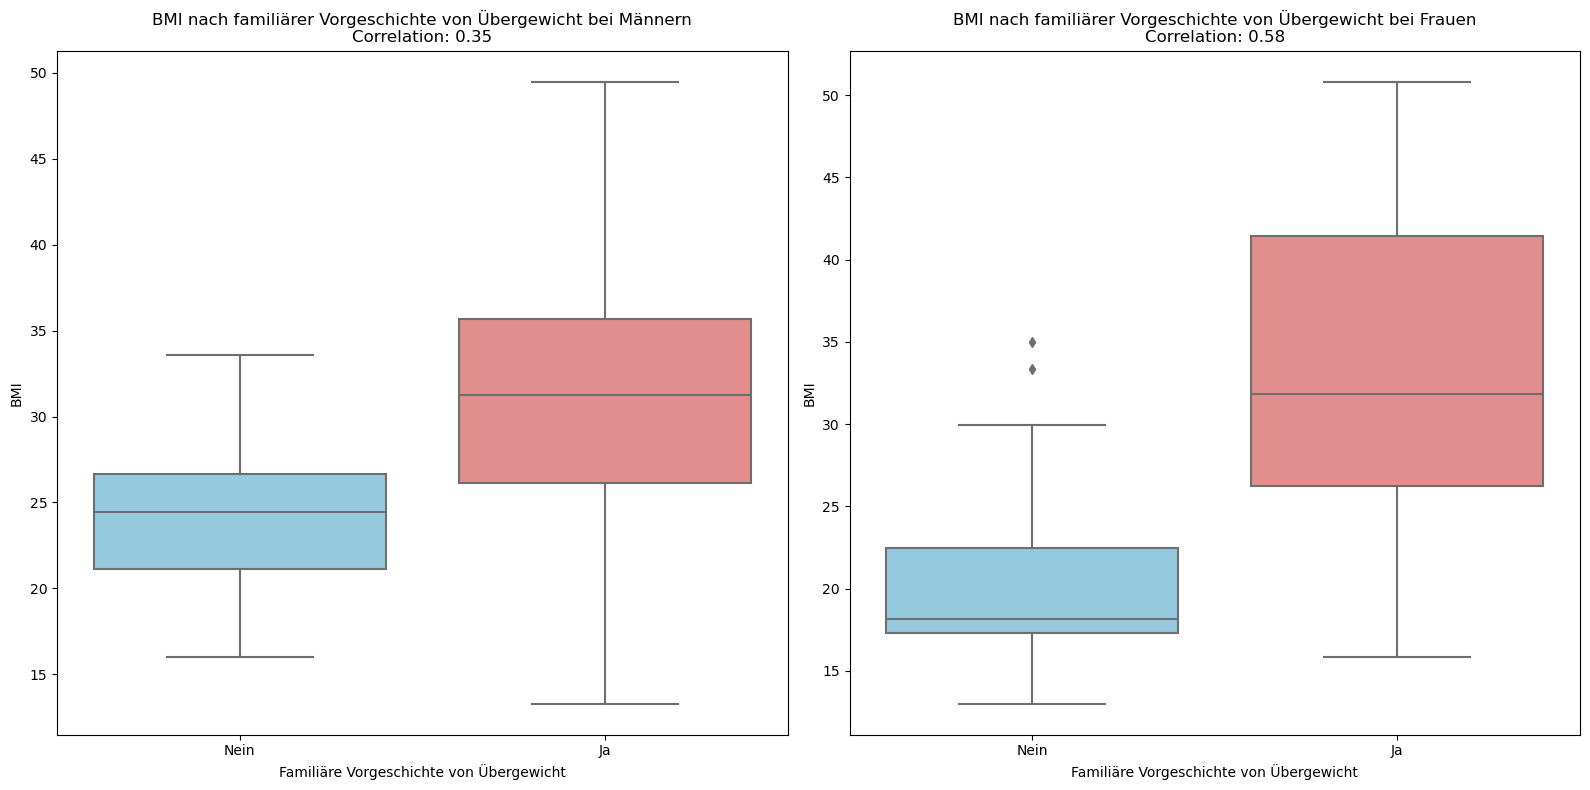

In [24]:
# 'family_history_with_overweight' nach numerisch konvertieren
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes': 1, 'no': 0})

# Überprüfen Sie die ersten Zeilen, um die Daten zu sehen
print(df[['BMI', 'family_history_with_overweight']].head())

# Berechnung der Korrelation zwischen BMI und family_history_with_overweight
correlation = df['BMI'].corr(df['family_history_with_overweight'])
print(f"Korrelation zwischen BMI und family_history_with_overweight: {correlation}")

# Filtern von Daten für Männer und Frauen
data_men = df[df['Gender'] == 'Male']
data_women = df[df['Gender'] == 'Female']

# Berechnung der Korrelation für Männer und Frauen
correlation_men = data_men['BMI'].corr(data_men['family_history_with_overweight'])
correlation_women = data_women['BMI'].corr(data_women['family_history_with_overweight'])
print(f"Korrelation zwischen BMI und family_history_with_overweight (Männer): {correlation_men}")
print(f"Korrelation zwischen BMI und family_history_with_overweight (Frauen): {correlation_women}")

# Box Plot zur Anzeige der BMI-Verteilung basierend auf der Familiengeschichte von Übergewicht

plt.figure(figsize=(16, 8))

# Plot für Männer
plt.subplot(1, 2, 1)
sns.boxplot(x='family_history_with_overweight', y='BMI', data=data_men, palette=['skyblue', 'lightcoral'])
plt.title(f'BMI nach familiärer Vorgeschichte von Übergewicht bei Männern\nCorrelation: {correlation_men:.2f}')
plt.xlabel('Familiäre Vorgeschichte von Übergewicht')
plt.ylabel('BMI')
plt.xticks([0, 1], ['Nein', 'Ja'])

# Plot für Frauen
plt.subplot(1, 2, 2)
sns.boxplot(x='family_history_with_overweight', y='BMI', data=data_women, palette=['skyblue', 'lightcoral'])
plt.title(f'BMI nach familiärer Vorgeschichte von Übergewicht bei Frauen\nCorrelation: {correlation_women:.2f}')
plt.xlabel('Familiäre Vorgeschichte von Übergewicht')
plt.ylabel('BMI')
plt.xticks([0, 1], ['Nein', 'Ja'])

plt.tight_layout()
plt.show()


Die Box Plots und die berechneten Korrelationen zeigen deutlich die Beziehung zwischen familiärer Vorgeschichte von Übergewicht und BMI, sowohl bei Männern als auch bei Frauen:

**Bei Männern**:

Männer mit einer familiären Vorgeschichte von Übergewicht ("Ja") haben einen signifikant höheren Median-BMI (ca. 33) im Vergleich zu Männern ohne diese Vorgeschichte ("Nein"), die einen Median-BMI von etwa 25 haben.
Die Streuung der BMI-Werte ist bei Männern mit familiärer Vorgeschichte von Übergewicht größer, was auf eine größere Variabilität innerhalb dieser Gruppe hinweist.

Die berechnete Korrelation beträgt 0.35, was auf eine moderate positive Beziehung zwischen familiärer Vorgeschichte von Übergewicht und BMI bei Männern hinweist.

**Bei Frauen**:

Frauen mit einer familiären Vorgeschichte von Übergewicht ("Ja") weisen ebenfalls einen deutlich höheren Median-BMI (ca. 32) auf im Vergleich zu Frauen ohne diese Vorgeschichte ("Nein"), die einen Median-BMI von etwa 19 haben.

Auch hier ist die Streuung der BMI-Werte bei Frauen mit familiärer Vorgeschichte von Übergewicht größer.

Die berechnete Korrelation beträgt 0.58, was auf eine starke positive Beziehung zwischen familiärer Vorgeschichte von Übergewicht und BMI bei Frauen hinweist.


Diese Ergebnisse könnten die Hypothese bestätigen, dass Menschen mit einer familiären Vorgeschichte von Übergewicht ein signifikant höheres Risiko haben, selbst fettleibig zu werden. Der Median-BMI ist in beiden Geschlechtern höher bei Personen mit familiärer Vorgeschichte von Übergewicht, und die Korrelationen zeigen eine starke Beziehung zwischen familiärer Vorgeschichte und BMI, insbesondere bei Frauen.

## Hypothese 3

Wir vermuten, dass Personen, die häufig zwischen den Mahlzeiten naschen, ein höheres Risiko haben könnten, übergewichtig oder fettleibig zu werden.

         BMI       CAEC  Gender
0  24.386526  Sometimes  Female
1  24.238227  Sometimes  Female
2  23.765432  Sometimes    Male
3  26.851852  Sometimes    Male
4  28.342381  Sometimes    Male


c:\Users\molom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\molom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\molom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\molom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

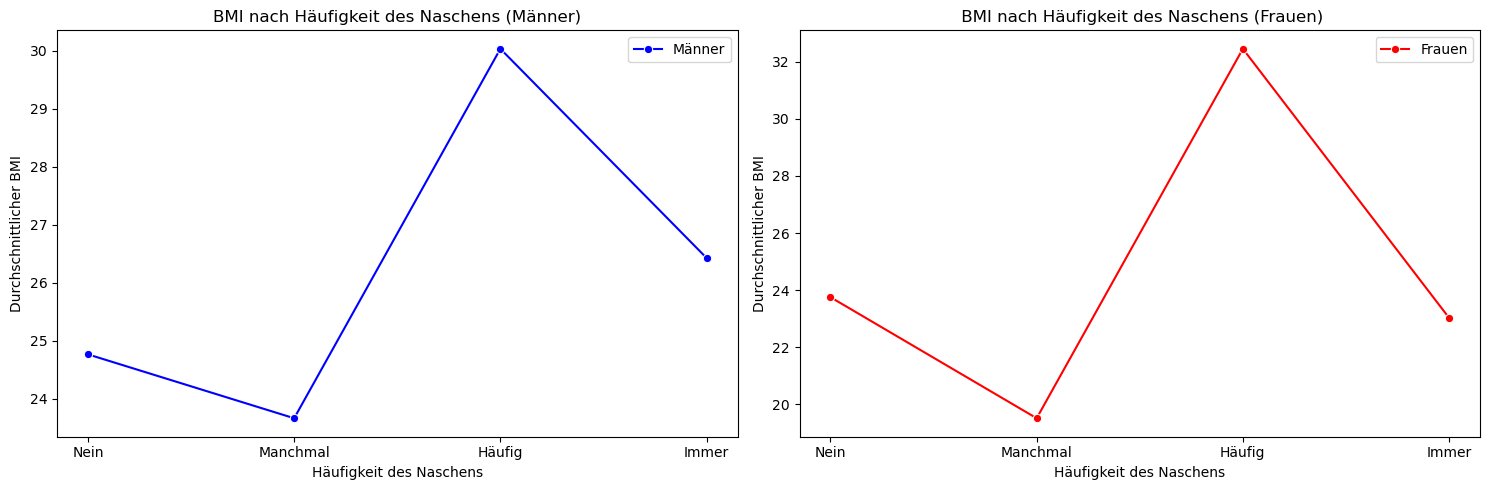

c:\Users\molom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\molom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


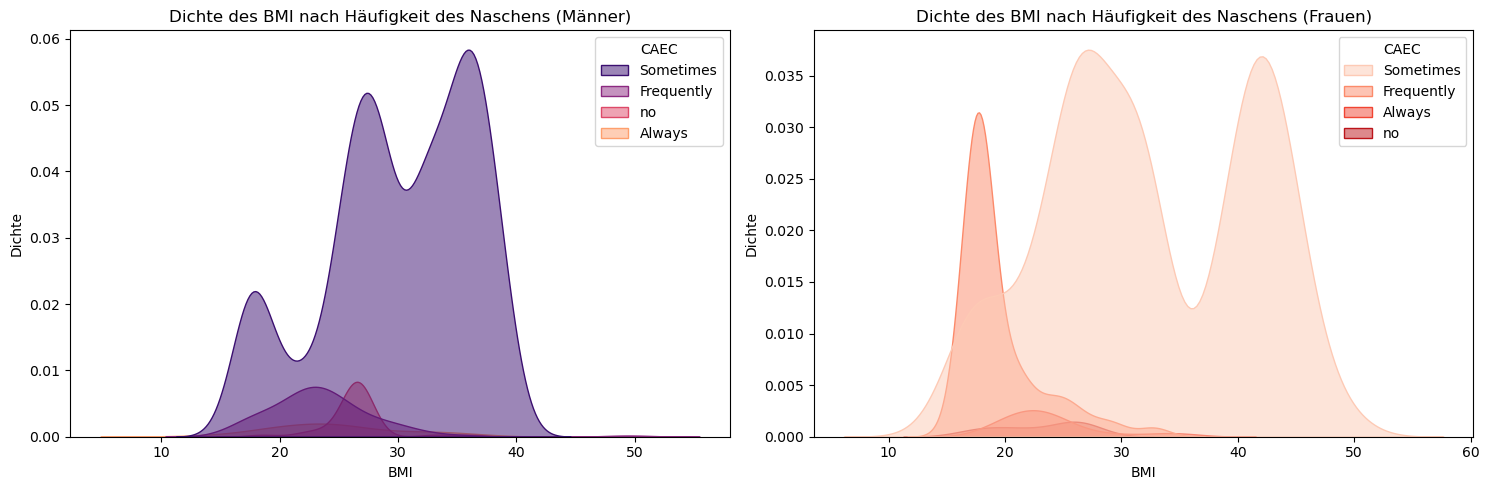

In [25]:
# Überprüfen der ersten Zeilen, um die Daten zu sehen
print(df[['BMI', 'CAEC', 'Gender']].head())

# Trennen der Daten nach Geschlecht
data_men = df[df['Gender'] == 'Male']
data_women = df[df['Gender'] == 'Female']

# Matplotlib-Figur erstellen für Line plots
plt.figure(figsize=(15, 5))

# Berechnung der durchschnittlichen BMI-Werte nach Häufigkeit des Naschens für Männer und Frauen
mean_bmi_men = data_men.groupby('CAEC')['BMI'].mean().reset_index()
mean_bmi_women = data_women.groupby('CAEC')['BMI'].mean().reset_index()

# Line plot für Männer
plt.subplot(1, 2, 1)
sns.lineplot(x='CAEC', y='BMI', data=mean_bmi_men, marker='o', linestyle='-', color='blue', label='Männer')
plt.title('BMI nach Häufigkeit des Naschens (Männer)')
plt.xlabel('Häufigkeit des Naschens')
plt.ylabel('Durchschnittlicher BMI')
plt.xticks([0, 1, 2, 3], ['Nein', 'Manchmal', 'Häufig', 'Immer'])
plt.legend()

# Line plot für Frauen
plt.subplot(1, 2, 2)
sns.lineplot(x='CAEC', y='BMI', data=mean_bmi_women, marker='o', linestyle='-', color='red', label='Frauen')
plt.title(' BMI nach Häufigkeit des Naschens (Frauen)')
plt.xlabel('Häufigkeit des Naschens')
plt.ylabel('Durchschnittlicher BMI')
plt.xticks([0, 1, 2, 3], ['Nein', 'Manchmal', 'Häufig', 'Immer'])
plt.legend()

plt.tight_layout()
plt.show()

# Matplotlib-Figur erstellen für Density plots
plt.figure(figsize=(15, 5))

# Density plot für Männer
plt.subplot(1, 2, 1)
sns.kdeplot(data=data_men, x='BMI', hue='CAEC', fill=True, palette='magma', alpha=0.5)
plt.title('Dichte des BMI nach Häufigkeit des Naschens (Männer)')
plt.xlabel('BMI')
plt.ylabel('Dichte')

# Density plot für Frauen
plt.subplot(1, 2, 2)
sns.kdeplot(data=data_women, x='BMI', hue='CAEC', fill=True, palette='Reds', alpha=0.5)
plt.title('Dichte des BMI nach Häufigkeit des Naschens (Frauen)')
plt.xlabel('BMI')
plt.ylabel('Dichte')

plt.tight_layout()
plt.show()


Die Line Plots und Density Plots zeigen die Beziehung zwischen der Häufigkeit des Naschens (CAEC) und dem BMI sowohl bei Männern als auch bei Frauen:

**Bei Männern**:

Der Line Plot zeigt, dass Männer, die häufig naschen ("Frequently"), einen höheren BMI haben(Ca 30) als Männer, die nie ("No") naschen mit Ca 25 als BMI, oder manchmal ("sometimes") mit Ca 23 oder immer ("Always") naschen mit Ca 26. 

Es ist eigentlich eine breite Verteilung der BMI bei Männern zu beoachten, die 'Sometimes' naschen. die Dichte varriert  von 0.02 für die pesonen ,deren des BMI zwischen 10-20 Liegt auf 0.05 für die pesonen ,deren des BMI zwischen 20-30 Liegt um 0.06 für die pesonen ,deren des BMI zwischen 30-40 Liegt.

**Bei Frauen**:

Der Line Plot zeigt, dass Frauen, die häufig naschen ("frequently") , ebenfalls einen höheren durchschnittlichen BMI haben von Ca 30 als Frauen, die nie ("Nein"), manchmal ("Sometimes") oder immer ("Always") naschen mit ca 24 (No), 19(Sometimes) , 26(Always)als BMI.

Der Density Plot zeigt eine ähnliche Verteilung wie bei den Männern , für die, die Sometimes naschen. Die  Dichte bei den Frauen liegt 0.035 für einen BMI von 30. Zwischen 30-40  liegt die Dichte zu 0.010 und das maximum trifft man zwischen 40-50 mit einer Dichte von 0.035. 

Nicht zu unterschätzen ist auch die personen , die häufig zwischen Naschen essen . Die Dichte liegt zu 0.030 für 20( Normal weight)als BMI

Diese Ergebnisse unterstützen die Hypothese, dass Personen, die häufig zwischen den Mahlzeiten naschen, ein höheres Risiko hätten, übergewichtig oder fettleibig zu werden. BMI ist bei Personen, die manchmal(Sometimes) naschen, höher, was auf ein erhöhtes Risiko für Fettleibigkeit hinweist. Der Median-BMI und die Verteilung der BMI-Werte zeigen, dass häufiges Naschen mit einer größeren Variabilität und höheren BMI-Werten verbunden ist.

## Hypothese 4

Wir hypothesieren, dass Personen, die stark von der Nutzung technologischer Geräte wie Smartphones, Computer, Fernseher und Videospielkonsolen abhängig sind, ein höheres Risiko haben, übergewichtig oder fettleibig zu werden. Um diese Hypothese zu testen, analysieren wir die Beziehung zwischen den folgenden Variablen:

- **TUE**: Nutzung technologischer Geräte (Stunden pro Tag).
- **BMI**: Body Mass Index, berechnet als Gewicht in Kilogramm geteilt durch das Quadrat der Körpergröße in Metern.


         BMI  TUE TUE_binned  Gender
0  24.386526  1.0        1-2  Female
1  24.238227  0.0        0-1  Female
2  23.765432  1.0        1-2    Male
3  26.851852  0.0        0-1    Male
4  28.342381  0.0        0-1    Male


C:\Users\molom\AppData\Local\Temp\ipykernel_63072\925679623.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_bmi_tech_use_men = data_men.groupby('TUE_binned')['BMI'].mean().reset_index()
C:\Users\molom\AppData\Local\Temp\ipykernel_63072\925679623.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_bmi_tech_use_women = data_women.groupby('TUE_binned')['BMI'].mean().reset_index()
c:\Users\molom\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain c

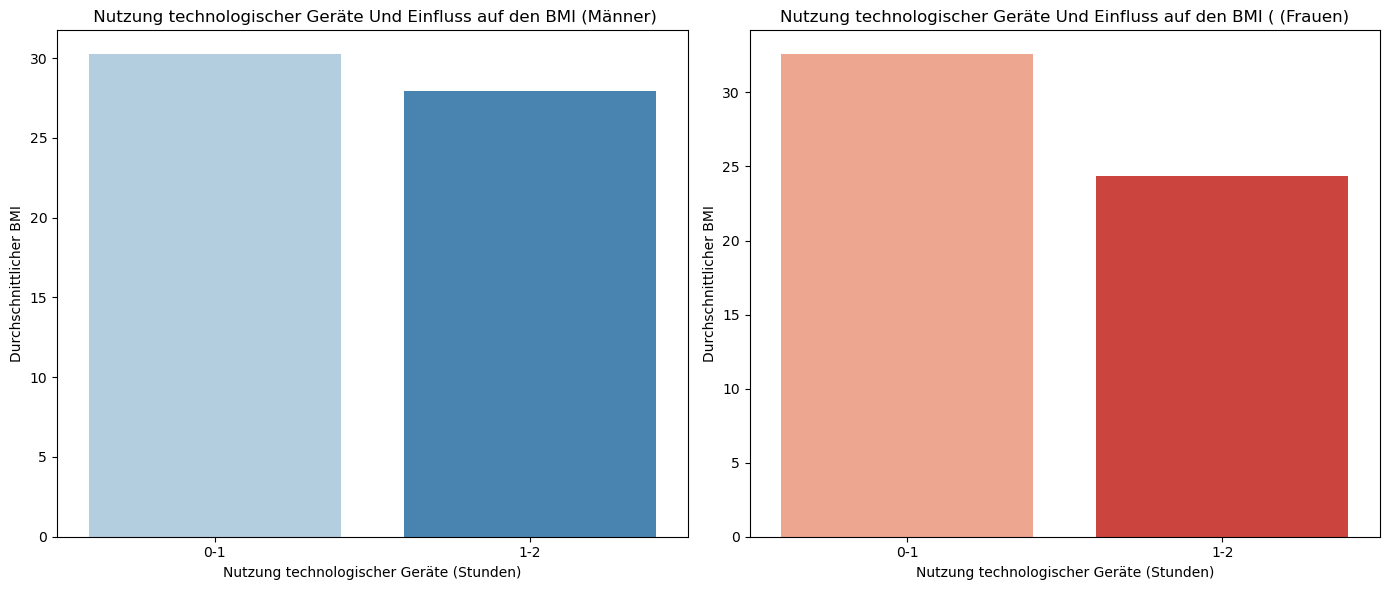

In [26]:
# Daten in Bins gruppieren für TUE
bins = [0, 1, 2]
labels = ['0-1', '1-2']
df['TUE_binned'] = pd.cut(df['TUE'], bins=bins, labels=labels, right=False)

# Überprüfen der ersten Zeilen, um die gruppierten Daten zu sehen
print(df[['BMI', 'TUE', 'TUE_binned', 'Gender']].head())

# Trennen der Daten nach Geschlecht
data_men = df[df['Gender'] == 'Male']
data_women = df[df['Gender'] == 'Female']

# Berechnung der durchschnittlichen BMI-Werte nach Nutzung technologischer Geräte für Männer und Frauen
mean_bmi_tech_use_men = data_men.groupby('TUE_binned')['BMI'].mean().reset_index()
mean_bmi_tech_use_women = data_women.groupby('TUE_binned')['BMI'].mean().reset_index()

# Matplotlib-Figur erstellen für Bar plots
plt.figure(figsize=(14, 6))

# Bar plot für Männer
plt.subplot(1, 2, 1)
sns.barplot(x='TUE_binned', y='BMI', data=mean_bmi_tech_use_men, palette='Blues')
plt.title(' Nutzung technologischer Geräte Und Einfluss auf den BMI (Männer)')
plt.xlabel('Nutzung technologischer Geräte (Stunden)')
plt.ylabel('Durchschnittlicher BMI')

# Bar plot für Frauen
plt.subplot(1, 2, 2)
sns.barplot(x='TUE_binned', y='BMI', data=mean_bmi_tech_use_women, palette='Reds')
plt.title('Nutzung technologischer Geräte Und Einfluss auf den BMI ( (Frauen)')
plt.xlabel('Nutzung technologischer Geräte (Stunden)')
plt.ylabel('Durchschnittlicher BMI')

plt.tight_layout()
plt.show()



Die Bar Plots zeigen die Beziehung zwischen der Nutzung technologischer Geräte (TUE) und dem BMI sowohl bei Männern als auch bei Frauen:

**Bei Männern**:

Der durchschnittliche BMI ist für Männer, die 0-1 Stunden technologischer Geräte nutzen, höher (ca. 30) als für Männer, die 1-2 Stunden nutzen (ca. 28).
Dies deutet darauf hin, dass eine geringere Nutzung technologischer Geräte mit einem höheren durchschnittlichen BMI verbunden ist.

**Bei Frauen**:

Der durchschnittliche BMI ist für Frauen, die 0-1 Stunden technologischer Geräte nutzen, ebenfalls höher (ca. 32) als für Frauen, die 1-2 Stunden nutzen (ca. 28).

Dies zeigt ein ähnliches Muster wie bei den Männern, wobei eine geringere Nutzung technologischer Geräte mit einem höheren durchschnittlichen BMI verbunden ist.

Personen die eher mehr Zeit mit Technologien verbringen, haben ein geringer BMI entweder bei den Männern oder bei den Frauen.

Diese Ergebnisse unterstützen nicht die Hypothese . Während erwartet wurde, dass eine höhere Nutzung technologischer Geräte mit einem höheren BMI korreliert, zeigen die Ergebnisse das Gegenteil: Eine geringere Nutzung ist mit einem höheren BMI verbunden. Der Median-BMI in den niedrigeren Nutzungsgruppen ist höher, was auf eine komplexere Beziehung zwischen technologischem Gerätegebrauch und BMI hinweist.

Wir haben diesen ersten Teil der Aufgabe abgeschlossen, der uns einen allgemeinen Überblick über die Daten in grafischer Form gab.

Im zweiten Notebook werden wir fortgeschrittenere Analysetechniken anwenden, um die Richtigkeit unserer Hypothesen zu überprüfen und Prognosen erstellen zu können....